In [9]:
import get_tweets
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [2]:
reddit = praw.Reddit(client_id='TcwTWLwCeSbE3g', client_secret='hqabrJIfgOCf6Vh-aW0HbLJq9-k', user_agent='datatools_project')

In [3]:
conservative_sub = reddit.subreddit('Conservative').top("year", limit=1000)
count = 0
posts = []
words = []
for post in conservative_sub:
    count+=1
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
    for word in post.title.split():
        words.append(word)
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

In [4]:
posts

,title,score,id,subreddit,url,num_comments,body,created
0,China is paying reddit to take down pictures o...,46864,ftaazt,Conservative,https://i.redd.it/kg56064faaq41.jpg,1324,,1.585809e+09
1,Terry Crews articulates everything wrong with ...,28093,hlo9os,Conservative,https://i.redd.it/tijj6shq22951.jpg,1654,,1.593991e+09
2,Trump calls for delay to 2020 US election,21076,i0ltok,Conservative,https://www.bbc.com/news/world-us-canada-53597...,6200,,1.596144e+09
3,RESUBMITTED: Behold: reddit after they receive...,18593,frxodq,Conservative,https://i.redd.it/hs8iq6955vp41.jpg,787,,1.585626e+09
4,Sen. Hawley Introduces Bill To Fine American C...,15609,hv5sje,Conservative,https://thefederalist.com/2020/07/20/sen-hawle...,773,,1.595360e+09
...,...,...,...,...,...,...,...,...
993,WATCH: Mike Ditka on Anthem Protests: 'If You ...,2573,hy7p9e,Conservative,https://www.breitbart.com/sports/2020/07/26/wa...,454,,1.595802e+09
994,Like thousands of other Vermonters...,2571,fxhk3x,Conservative,https://i.redd.it/7s7me293kor41.jpg,158,,1.586418e+09
995,The latest scandal that will finally bring dow...,2569,e7ccje,Conservative,https://i.redd.it/5v6u2rudj6341.png,208,,1.575740e+09
996,JULY 4TH,2567,gm4zvu,Conservative,https://i.redd.it/8w1phjl2yjz41.jpg,176,,1.589849e+09


In [5]:
len(words)

10500

In [6]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words.append("-")
stop_words.append("--")
stop_words.append("|")
stop_words.append("—")

trumps = ["Trump", "Trump's", "Trump’s"]
US = ["US", "U.S."]

dicw = {}
for wrd in words:
    if wrd.lower() not in stop_words:
        if wrd in trumps:
            wrd="Trump"
        if wrd in US:
            wrd = "U.S."
        
        if wrd not in dicw.keys():
            dicw[wrd]=0
        else:
            dicw[wrd]+=1

topp = sorted(dicw, key=dicw.get, reverse=True)[:35]
for i in topp:
    print(i,dicw[i])

Trump 66
Black 40
people 32
Lives 31
Biden 31
says 24
China 19
Joe 19
white 19
BLM 19
Matter 19
like 18
black 16
police 15
Reddit 14
U.S. 13
People 13
CNN 12
one 12
man 12
Bernie 11
new 11
Americans 11
never 11
White 11
want 11
2020 10
really 10
media 10
go 10
Terry 9
American 9
think 9
protesters 9
Seattle 9


In [7]:
import get_tweets
posts.title = posts.title.apply(get_tweets.text_cleaner)      
posts.to_csv('data/reddit-Conservative.csv')

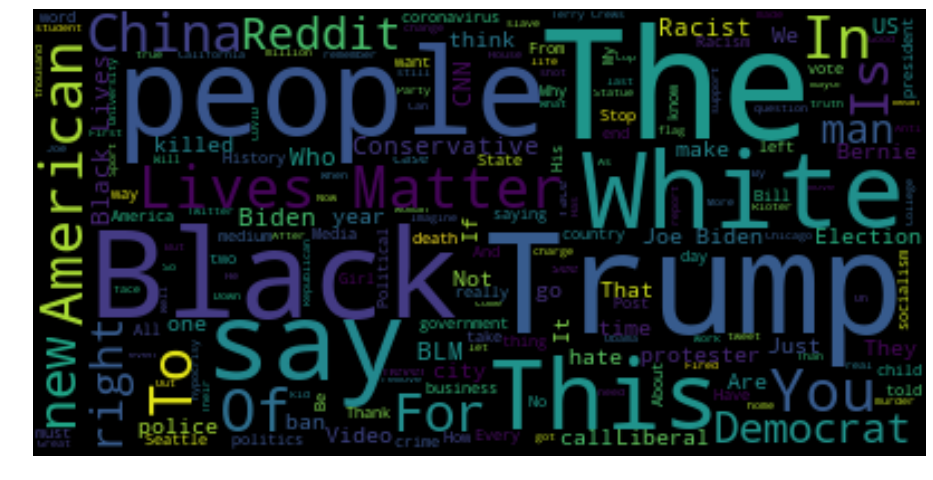

In [10]:
headlines = ' '.join(posts.title.to_list())
wordcloud = WordCloud().generate(headlines)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()